In [14]:
import sys,os
sys.path.append(os.path.abspath(os.path.join(sys.path[0], 'utils')))
sys.path.append(os.path.abspath(os.path.join(sys.path[0], 'db_helper')))
sys.path.append('../')
from mongo_helper import *
from utils import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
test = Job(client = pymongo.MongoClient("mongodb://localhost:27017/") ,db = pymongo.MongoClient("mongodb://localhost:27017/")["Job_Aggregator"])

In [16]:
data = test.getJobData('site_job')

In [17]:
df = pd.DataFrame.from_records(data)
df.reset_index(level=0, inplace=True)

In [50]:
def normalizeCity(city):
    city = city.replace('Khu vực: ','')
    if 'Hà Nội' in city and 'Hồ Chí Minh' not in city or 'Ha Noi' in city:
        return 'Hà Nội'
    if 'Hồ Chí Minh' in city and 'Hà Nội' not in city or 'Ho Chi Minh' in city:
        return 'Tp Hồ Chí Minh'
    if 'Da Nang' in city:
        return 'Đà Nẵng'
    if city == '':
        return 'remote'
    return city
def getMonthYear(date_str):
    month = date_str.split('/')[1]
    if month[0] == '0':
        month = month.replace('0','')
    year = date_str.split('/')[2]
    return  month + '-' + year
# print(normalizeCity('Khu vực: An Giang, Bạc Liêu, Bến Tre, Cà Mau, Cần Thơ, Đồng Tháp, Hậu Giang, Kiên Giang, Sóc Trăng, Tiền Giang, Trà Vinh, Vĩnh Long'))

In [51]:
df = df.drop_duplicates(subset = ['city','company','title'],keep = 'first')

In [52]:
#thong ke viec lam theo thanh pho
df['city'].apply(normalizeCity)
city = df['city'].apply(normalizeCity).value_counts()
print(city[:5])
print(type(city))

Hà Nội                 3380
Tp Hồ Chí Minh         3374
Đà Nẵng                 167
Hà Nội, Hồ Chí Minh      87
Bình Dương               66
Name: city, dtype: int64
<class 'pandas.core.series.Series'>


In [53]:
top5_city = city[:5]

<AxesSubplot:title={'center':'top 5 region with the most recruitment'}>

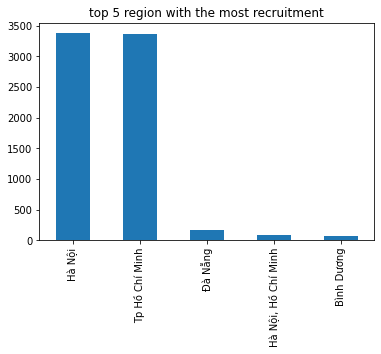

In [54]:
top5_city.plot(x ='city',y='num_job', kind = 'bar',title = 'top 5 region with the most recruitment')

In [55]:
df['month'] = df['update_time'].apply(getMonthYear)

<AxesSubplot:title={'center':'recruiment news of first 3 months 2021'}>

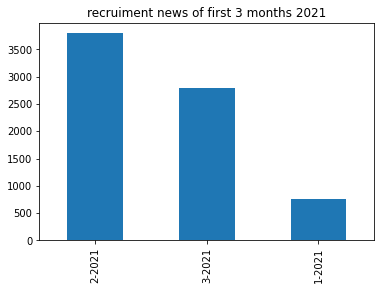

In [56]:
monthly_recruitment = df['month'].value_counts()
monthly_recruitment[:3].plot(kind = 'bar',title = 'recruitment news of first 3 months 2021')

In [57]:
def titleNormalize(title):
    it_title = ['python','frontend','Java','.Net','tester','data engineer','iOS','React Native','PHP','Nodejs','golang','Ui/Ux','Backend']
    for keyword in it_title:
        if keyword in title:
            return keyword
    return title

<AxesSubplot:title={'center':'top recruitment title'}>

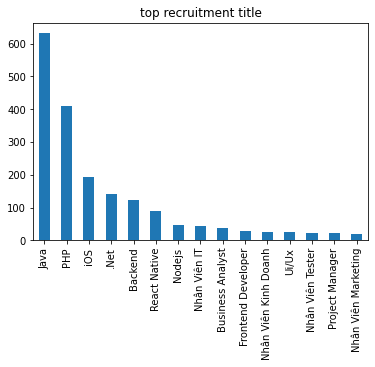

In [58]:
df['title'] = df['title'].apply(titleNormalize)
df['title'].value_counts()[:15].plot(kind = 'bar',title = 'top recruitment title')

In [59]:
len(df[df['salary'] != '']['salary'])

2064

<AxesSubplot:title={'center':'Top 15 company with most recruitment news'}>

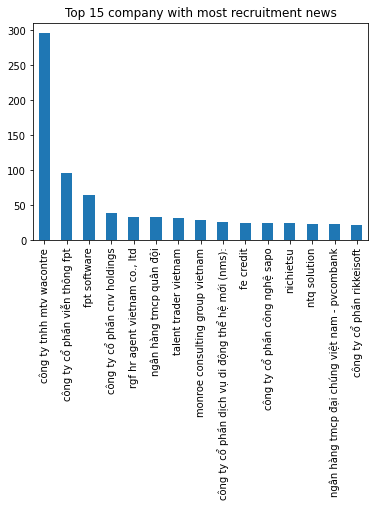

In [60]:
top_company = df['company'].apply(lambda x: x.lower()).value_counts()[:20]
top_company[:15].plot(kind = 'bar',title = 'Top 15 company with most recruitment news')

In [61]:
test = df.groupby(['city']).count()

In [ ]:
cleaned_data = df.